# Materials

## Prepare environment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!git clone "https://github.com/sunwucheng/IDB_drilling_signal.git" /content/drive/MyDrive/IDB_drilling_signal
!nvidia-smi

Mounted at /content/drive
Cloning into '/content/drive/MyDrive/IDB_drilling_signal'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 84 (delta 0), reused 5 (delta 0), pack-reused 75
Unpacking objects: 100% (84/84), 151.47 MiB | 8.55 MiB/s, done.
Updating files: 100% (70/70), done.
Tue Apr 11 10:28:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            O

## Display signal data

### Load signal data

In [2]:
import numpy as np
import scipy.io as scio

def read_matFile(signal_path):
  signal_file = scio.loadmat(signal_path)
  signal_value = signal_file['samples']
  signal_value = np.squeeze(signal_value)
  return signal_value

def read_wavFile(signal_path):
  signal_rate, signal_value = scio.wavfile.read(signal_path)
  return signal_value, signal_rate

import librosa

def read_soundFile(signal_path):
  signal_value, signal_rate = librosa.load(signal_path, sr=None, mono=True, offset=0.0, duration=None)
  return signal_value, signal_rate

In [3]:
S32h = read_matFile("/content/drive/MyDrive/IDB_drilling_signal/Rock_drilling_signal/experiment1/3-2h.mat")
S41h = read_matFile("/content/drive/MyDrive/IDB_drilling_signal/Rock_drilling_signal/experiment1/4-1h.mat")
S42h = read_matFile("/content/drive/MyDrive/IDB_drilling_signal/Rock_drilling_signal/experiment1/4-2h.mat")
S43b = read_matFile("/content/drive/MyDrive/IDB_drilling_signal/Rock_drilling_signal/experiment1/4-3b.mat")

S41H, RATE = read_soundFile("/content/drive/MyDrive/IDB_drilling_signal/Rock_drilling_signal/experiment1/4-1h.wav")
S42H, RATE = read_soundFile("/content/drive/MyDrive/IDB_drilling_signal/Rock_drilling_signal/experiment1/4-2h.wav")
S43B1, RATE = read_soundFile("/content/drive/MyDrive/IDB_drilling_signal/Rock_drilling_signal/experiment1/4-3b1.wav")
S43B2, RATE = read_soundFile("/content/drive/MyDrive/IDB_drilling_signal/Rock_drilling_signal/experiment1/4-3b2.wav")

print("S32h : ", S32h.shape, len(S32h)/RATE, 's')
print("S41h : ", S41h.shape, len(S41h)/RATE, 's')
print("S42h : ", S42h.shape, len(S42h)/RATE, 's')
print("S43b : ", S43b.shape, len(S43b)/RATE, 's')
print("---------------------------------------")
print("S41H : ", S41H.shape, len(S41H)/RATE, 's')
print("S42H : ", S42H.shape, len(S42H)/RATE, 's')
print("S43B1: ", S43B1.shape, len(S43B1)/RATE, 's')
print("S43B2: ", S43B2.shape, len(S43B2)/RATE, 's')

S32h :  (8880128,) 740.0106666666667 s
S41h :  (7216896,) 601.408 s
S42h :  (11019776,) 918.3146666666667 s
S43b :  (22244352,) 1853.696 s
---------------------------------------
S41H :  (14400000,) 1200.0 s
S42H :  (14400000,) 1200.0 s
S43B1:  (14400000,) 1200.0 s
S43B2:  (14400000,) 1200.0 s


### Plot signal data

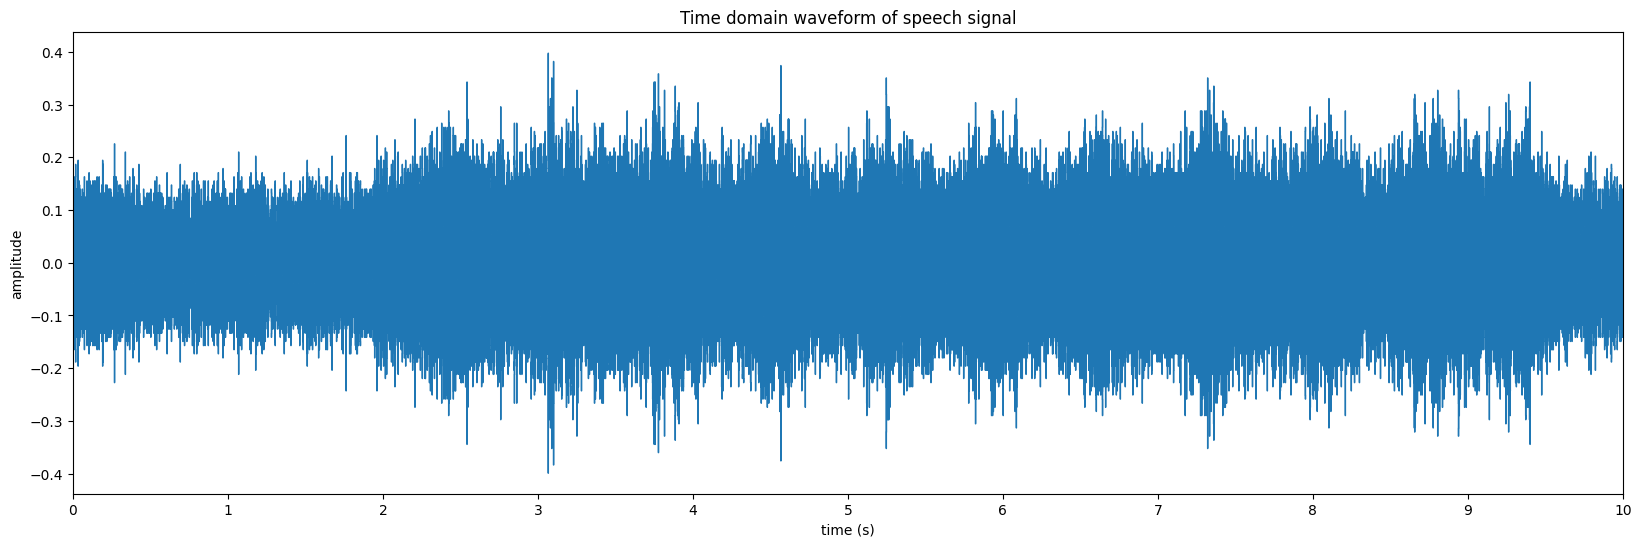

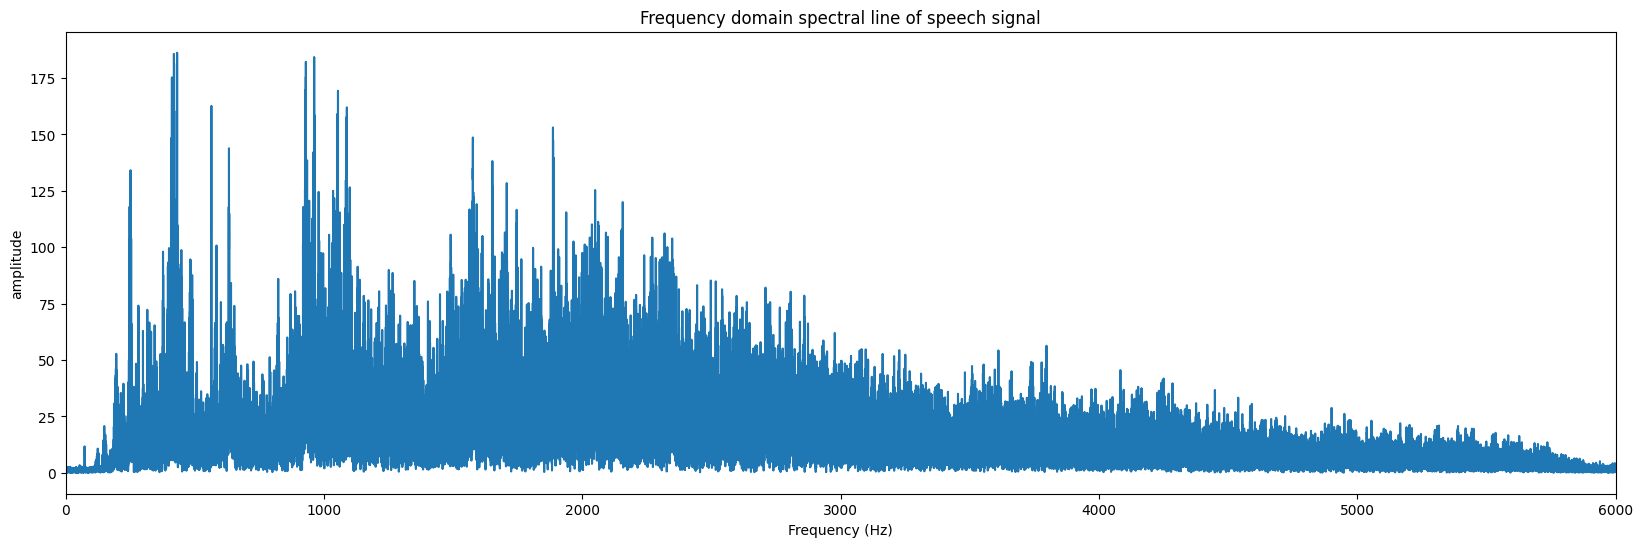

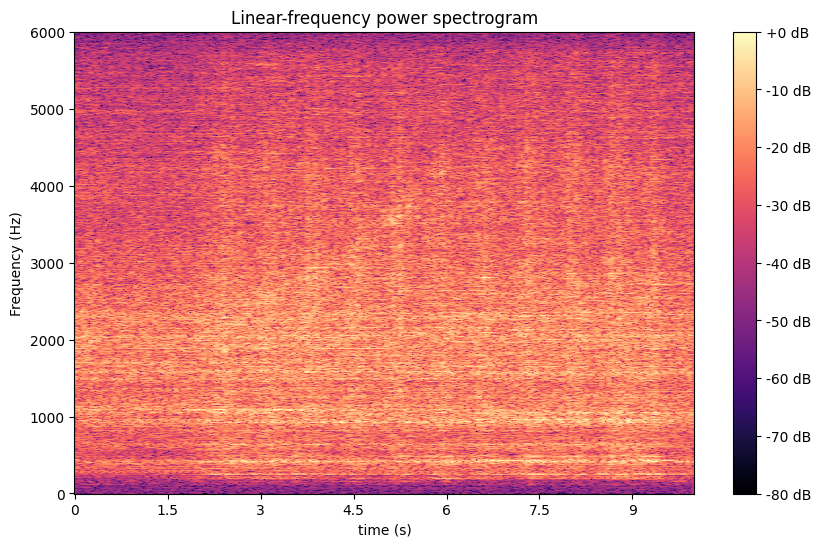

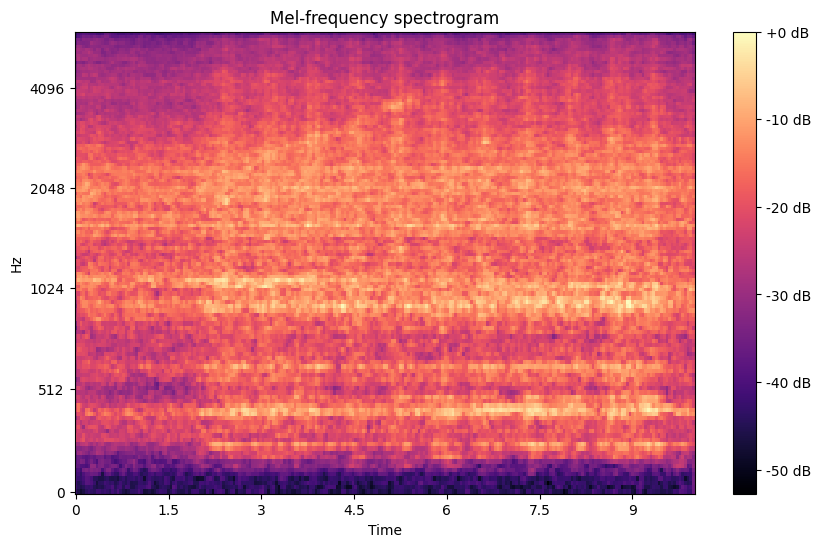

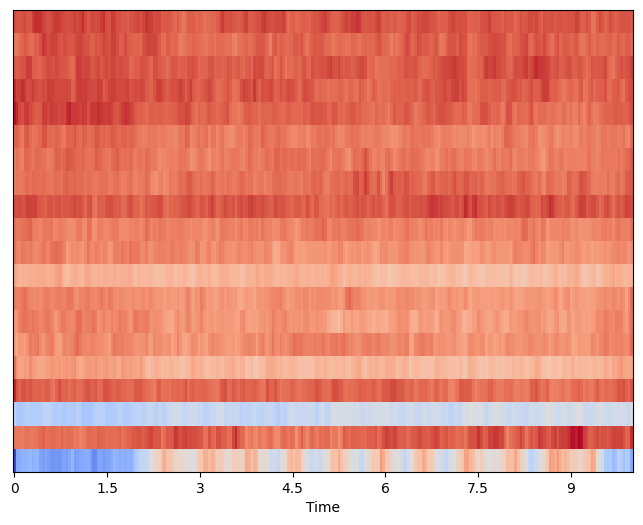

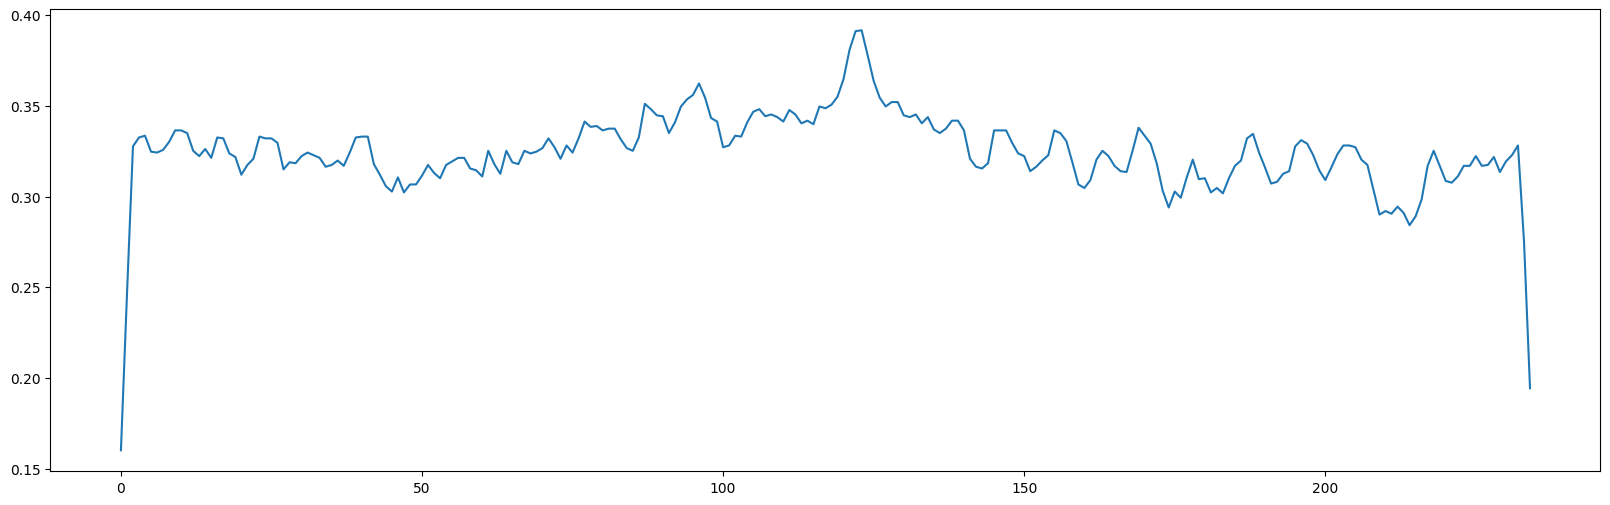

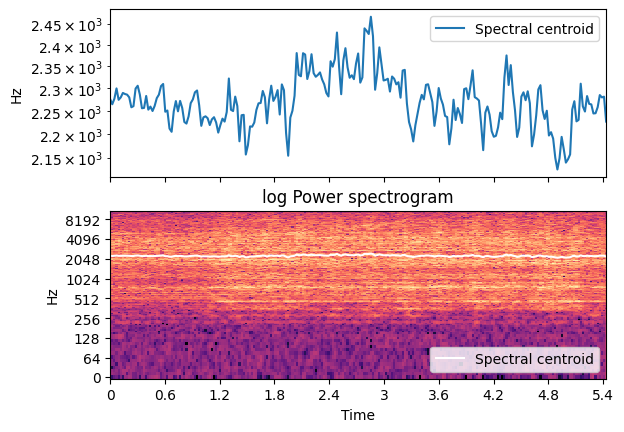

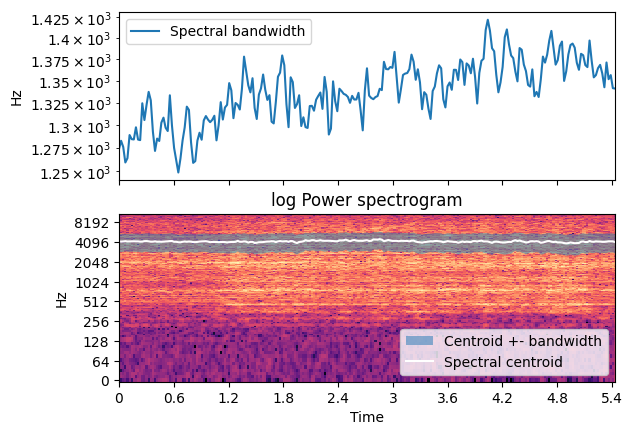

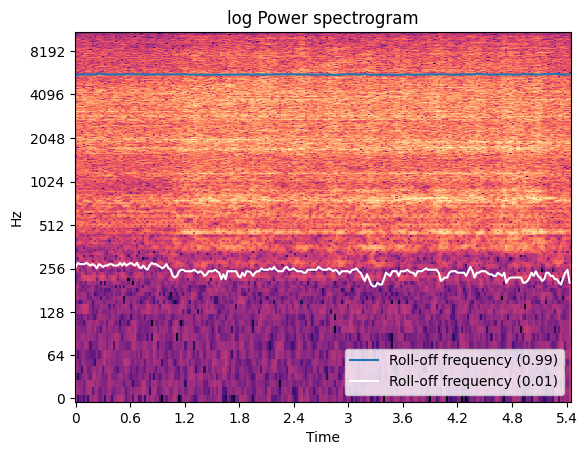

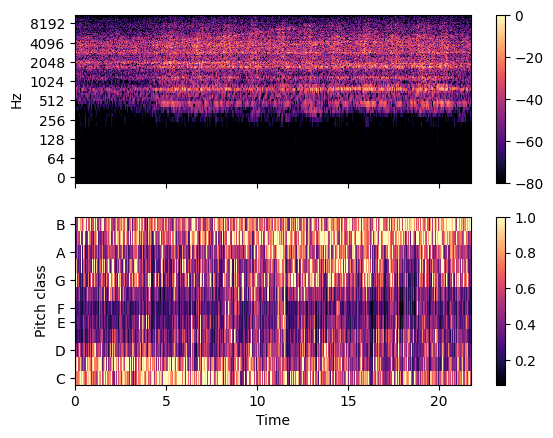

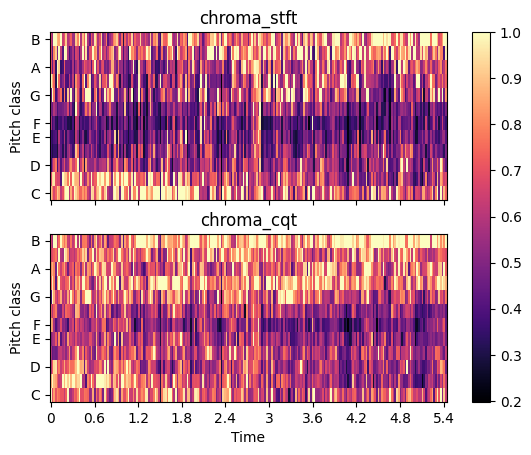

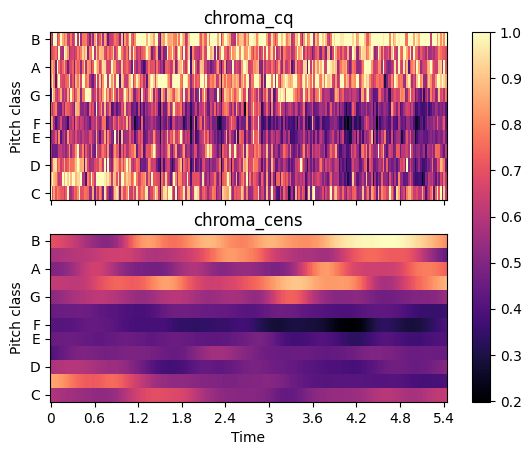

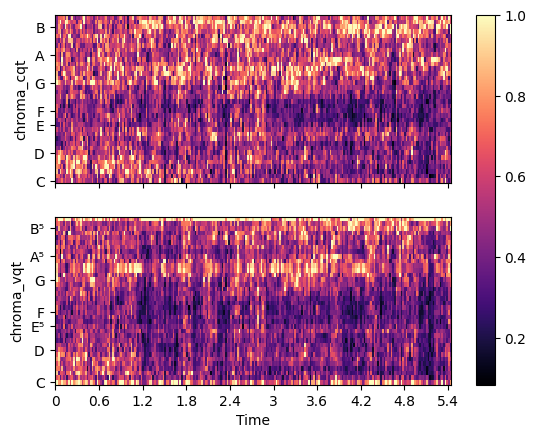

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

def displayWaveform(signal, rate):
  plt.figure(figsize=(20,6))
  max = np.max(np.absolute(signal))*1.2
  time = np.arange(0, len(SIGNAL)) / RATE
  # plt.plot(time, signal)
  librosa.display.waveshow(signal, sr=rate)
  plt.title("Time domain waveform of speech signal")
  plt.xlabel("time (s)")
  plt.ylabel("amplitude")
  plt.xlim(0,len(SIGNAL)/RATE)
  ymin, ymax = plt.ylim()
  ylim = np.maximum(np.abs(ymin), np.abs(ymax))
  plt.ylim(-ylim, ylim)

def displaySpectrum(signal, rate):
  plt.figure(figsize=(20,6)) 
  s = np.fft.fft(signal)
  m = np.abs(s)
  # f = np.linspace(0, rate, len(m))
  # plt.plot(f, m)
  n = len(signal)
  f = np.fft.fftfreq(n, 1/rate)
  plt.plot(f[:n//2],m[:n//2])
  plt.title("Frequency domain spectral line of speech signal")
  plt.xlabel("Frequency (Hz)")
  plt.ylabel("amplitude")
  plt.xlim(0, rate//2)

def displaySpectrogram(signal, rate, fftlen):    
  plt.figure(figsize=(10,6))
  # plt.specgram(signal, NFFT=fftlen, Fs=rate, noverlap=int(fftlen*0.25), window=np.hanning(fftlen))
  signal_db = librosa.amplitude_to_db(np.abs(librosa.stft(signal, hop_length=int(fftlen*0.25))), ref=np.max) 
  librosa.display.specshow(signal_db, sr=rate, hop_length=int(fftlen*0.25), x_axis='time', y_axis='linear')
  plt.title('Linear-frequency power spectrogram')
  plt.xlabel('time (s)')
  plt.ylabel('Frequency (Hz)')
  plt.colorbar(format="%+2.0f dB")

def displayMelspectrogram(signal, rate):
  plt.figure(figsize=(10,6))
  # melspectrogram = librosa.feature.melspectrogram(y=signal, sr=rate)
  D = np.abs(librosa.stft(signal))**2
  S = librosa.feature.melspectrogram(S=D, sr=rate)
  S_dB = librosa.power_to_db(S, ref=np.max)
  img = librosa.display.specshow(S_dB, sr=rate, fmax=rate/2, x_axis='time', y_axis='mel') 
  plt.title('Mel-frequency spectrogram')
  plt.colorbar(format='%+2.0f dB')

def diaplayMFCC(signal, rate):
  plt.figure(figsize=(8,6))
  mfccs = librosa.feature.mfcc(y=signal, sr=rate)
  librosa.display.specshow(mfccs, sr=rate, x_axis='time')

def displayZCR(signal, rate):
  plt.figure(figsize=(20, 6))
  zcrs = librosa.feature.zero_crossing_rate(signal)  
  plt.plot(zcrs[0])

from sklearn import preprocessing
def normalize(x, axis=0):
    return preprocessing.minmax_scale(x, axis=axis)

def displayCentroids(signal, rate):
  # spectral_centroids = librosa.feature.spectral_centroid(y=signal, sr=rate)[0]
  # frames = range(len(spectral_centroids))
  # times = librosa.frames_to_time(frames)
  # librosa.display.waveshow(signal, sr=rate, alpha=0.4)
  # plt.plot(times, normalize(spectral_centroids), color='r')

  cent = librosa.feature.spectral_centroid(y=signal, sr=rate) 
  S, phase = librosa.magphase(librosa.stft(y=signal))
  S_db = librosa.amplitude_to_db(S, ref=np.max)
  librosa.feature.spectral_centroid(S=S)
  freqs, times, D = librosa.reassigned_spectrogram(signal, fill_nan=True)
  librosa.feature.spectral_centroid(S=np.abs(D), freq=freqs)
  times = librosa.times_like(cent)

  fig, ax = plt.subplots(nrows=2, sharex=True)
  ax[0].semilogy(times, cent[0], label='Spectral centroid')
  ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
  ax[0].legend()
  ax[0].label_outer()

  librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax[1])
  ax[1].plot(times, cent.T, label='Spectral centroid', color='w')
  ax[1].set(title='log Power spectrogram')
  ax[1].legend(loc='lower right')

def displayBandwidth(signal, rate):
  # spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=signal+0.01, sr=rate)[0]
  # spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=signal+0.01, sr=rate, p=3)[0]
  # spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=signal+0.01, sr=rate, p=4)[0]
  # librosa.display.waveshow(signal, sr=rate, alpha=0.4)
  # normal2 = preprocessing.minmax_scale(spectral_bandwidth_2, axis=0)
  # normal3 = preprocessing.minmax_scale(spectral_bandwidth_3, axis=0)
  # normal4 = preprocessing.minmax_scale(spectral_bandwidth_4, axis=0)
  # spectral_centroids = librosa.feature.spectral_centroid(y=signal, sr=rate)[0]
  # frames = range(len(spectral_centroids))
  # times = librosa.frames_to_time(frames)
  # plt.plot(times, normal2, color='r')
  # plt.plot(times, normal3, color='g')
  # plt.plot(times, normal4, color='y')
  # plt.legend(('p = 2', 'p = 3', 'p = 4'))

  spec_bw = librosa.feature.spectral_bandwidth(y=signal, sr=rate)
  S, phase = librosa.magphase(librosa.stft(y=signal))
  S_db = librosa.amplitude_to_db(S, ref=np.max)
  librosa.feature.spectral_bandwidth(S=S)
  freqs, times, D = librosa.reassigned_spectrogram(signal, fill_nan=True)
  librosa.feature.spectral_bandwidth(S=np.abs(D), freq=freqs)
  times = librosa.times_like(spec_bw)
  centroid = librosa.feature.spectral_centroid(S=S)

  fig, ax = plt.subplots(nrows=2, sharex=True)
  ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
  ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
  ax[0].legend()
  ax[0].label_outer()

  librosa.display.specshow(S_db, y_axis='log', x_axis='time', ax=ax[1])
  ax[1].set(title='log Power spectrogram')
  ax[1].fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]), np.minimum(centroid[0] + spec_bw[0], rate/2), alpha=0.5, label='Centroid +- bandwidth')
  ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
  ax[1].legend(loc='lower right')

def displayRolloff(signal, rate):
  # spectral_rolloff = librosa.feature.spectral_rolloff(y=signal+0.01, sr=rate)[0]
  # librosa.display.waveshow(signal, sr=rate, alpha=0.4)
  # spectral_centroids = librosa.feature.spectral_centroid(y=signal, sr=rate)[0]
  # frames = range(len(spectral_centroids))
  # times = librosa.frames_to_time(frames)
  # normals = preprocessing.minmax_scale(spectral_rolloff, axis=0)
  # plt.plot(times, normals, color='r')

  librosa.feature.spectral_rolloff(y=signal, sr=rate)
  rolloff = librosa.feature.spectral_rolloff(y=signal, sr=rate, roll_percent=0.99)
  rolloff_min = librosa.feature.spectral_rolloff(y=signal, sr=rate, roll_percent=0.01)
  S, phase = librosa.magphase(librosa.stft(signal))
  S_db = librosa.amplitude_to_db(S, ref=np.max)
  librosa.feature.spectral_rolloff(S=S, sr=rate)
  librosa.feature.spectral_rolloff(y=signal, sr=rate, roll_percent=0.95)

  fig, ax = plt.subplots()
  librosa.display.specshow(S_db, y_axis='log', x_axis='time', ax=ax)
  ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')
  ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w', label='Roll-off frequency (0.01)')
  ax.legend(loc='lower right')
  ax.set(title='log Power spectrogram')

def displayChromastft(signal, rate, fftlen):
  # plt.figure(figsize=(20, 6))
  # chromagram = librosa.feature.chroma_stft(signal, sr=rate, hop_length=int(fftlen*0.25))
  # librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=fftlen*0.25, cmap='coolwarm')

  S = np.abs(librosa.stft(signal))
  chroma = librosa.feature.chroma_stft(S=S, sr=rate)
  S = np.abs(librosa.stft(signal, n_fft=fftlen))**2
  S_db = librosa.amplitude_to_db(S, ref=np.max)
  chroma = librosa.feature.chroma_stft(S=S, sr=rate)

  fig, ax = plt.subplots(nrows=2, sharex=True)
  img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax[0])
  fig.colorbar(img, ax=[ax[0]])
  ax[0].label_outer()
  img = librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', ax=ax[1])
  fig.colorbar(img, ax=[ax[1]])

def displayChromacqt(signal, rate, n_chroma, n_fft):
  chroma_stft = librosa.feature.chroma_stft(y=signal, sr=rate, n_chroma=n_chroma, n_fft=n_fft)
  chroma_cq = librosa.feature.chroma_cqt(y=signal, sr=rate)

  fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
  img1 = librosa.display.specshow(chroma_stft, x_axis='time', y_axis='chroma', ax=ax[0])
  ax[0].set(title='chroma_stft')
  ax[0].label_outer()

  img2 = librosa.display.specshow(chroma_cq, x_axis='time', y_axis='chroma', ax=ax[1])
  ax[1].set(title='chroma_cqt')
  fig.colorbar(img2, ax=ax)

def displayChromacens(signal, rate):
  chroma_cens = librosa.feature.chroma_cens(y=signal, sr=rate)
  chroma_cq = librosa.feature.chroma_cqt(y=signal, sr=rate)

  fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
  img1 = librosa.display.specshow(chroma_cq, x_axis='time', y_axis='chroma', ax=ax[0])
  ax[0].set(title='chroma_cq')
  ax[0].label_outer()
  img2 = librosa.display.specshow(chroma_cens, x_axis='time', y_axis='chroma', ax=ax[1])
  ax[1].set(title='chroma_cens')
  fig.colorbar(img1, ax=ax)

def displayChromavqt(signal, rate, n_bins):
  chroma_cq = librosa.feature.chroma_cqt(y=signal, sr=rate, n_chroma=n_bins)
  chroma_vq = librosa.feature.chroma_vqt(y=signal, sr=rate, intervals='ji5', bins_per_octave=n_bins)

  fig, ax = plt.subplots(nrows=2, sharex=True)
  img1 = librosa.display.specshow(chroma_cq, x_axis='time', y_axis='chroma', ax=ax[0], bins_per_octave=n_bins)
  ax[0].set(ylabel='chroma_cqt')
  ax[0].label_outer()

  img2 = librosa.display.specshow(chroma_vq, y_axis='chroma_fjs', x_axis='time', ax=ax[1], bins_per_octave=n_bins, intervals='ji5')
  ax[1].set(ylabel='chroma_vqt')
  fig.colorbar(img2, ax=ax)

def plot_wave(signal, rate):  
  displayWaveform(signal, rate)
  displaySpectrum(signal, rate)
  displaySpectrogram(signal, rate, fftlen=512)
  displayMelspectrogram(signal, rate)
  diaplayMFCC(signal, rate)
  displayZCR(signal, rate)
  displayCentroids(signal, rate)
  displayBandwidth(signal, rate)
  displayRolloff(signal, rate)
  displayChromastft(signal, rate, fftlen=512)
  displayChromacqt(signal, rate, n_chroma=12, n_fft=512)
  displayChromacens(signal, rate)
  displayChromavqt(signal, rate, n_bins=36)

SIGNAL = S41h[-120000:]
RATE = RATE
plot_wave(SIGNAL, RATE)

import IPython

IPython.display.Audio(data=SIGNAL, rate=RATE)

### Convert to sound

In [5]:
import os
import soundfile

soundfile.write(("/content/drive/MyDrive/IDB_drilling_signal/Rock_drilling_signal/experiment1/S32h.wav"), S32h, RATE)
soundfile.write(("/content/drive/MyDrive/IDB_drilling_signal/Rock_drilling_signal/experiment1/S41h.wav"), S41h, RATE)
soundfile.write(("/content/drive/MyDrive/IDB_drilling_signal/Rock_drilling_signal/experiment1/S42h.wav"), S42h, RATE)
soundfile.write(("/content/drive/MyDrive/IDB_drilling_signal/Rock_drilling_signal/experiment1/S43b.wav"), S43b, RATE)

## Drilling table treatment

### Load parameter table

In [6]:
# S31h 15:10:51-15:18:26 (15:10:00-15:19:22) [54:-56,1:-1] 455s
# S32h 15:25:33-15:43:18 (15:25:00-15:43:22) [36:-4 ,1:-1] 1065s
# S33b 15:48:20-16:13:46 (15:48:00-16:13:50) [23:-4 ,1:-1] 1526s
# S41h 16:26:25-16:39:33 (16:26:00-16:39:50) [28:-17,1:-1] 788s
# S42h 16:54:57-17:16:30 (16:54:30-17:16:50) [30:-20,1:-1] 1293s
# S43b 17:24:00-18:00:24 (17:24:00-18:00:50) [3:-26 ,1:-1] 2184s

# S31h_dict = {"path":"/content/drive/MyDrive/IDB_drilling_signal/Rock_drilling_signal/experiment1/3-1h.xls", "index1":54, "index2":-56}
S32h_dict = {"path":"/content/drive/MyDrive/IDB_drilling_signal/Rock_drilling_signal/experiment1/3-2h.xls", "index1":36, "index2":-4}
# S33b_dict = {"path":"/content/drive/MyDrive/IDB_drilling_signal/Rock_drilling_signal/experiment1/3-3b.xls", "index1":23, "index2":-4}
S41h_dict = {"path":"/content/drive/MyDrive/IDB_drilling_signal/Rock_drilling_signal/experiment1/4-1h.xls", "index1":28, "index2":-17}
S42h_dict = {"path":"/content/drive/MyDrive/IDB_drilling_signal/Rock_drilling_signal/experiment1/4-2h.xls", "index1":30, "index2":-20}
S43b_dict = {"path":"/content/drive/MyDrive/IDB_drilling_signal/Rock_drilling_signal/experiment1/4-3b.xls", "index1":3, "index2":-26}

In [7]:
import pandas as pd

def load_table(SIGNAL_dict):
  SIGNAL_pd = pd.read_excel(SIGNAL_dict["path"])
  IPython.display.display(SIGNAL_pd)
  SIGNAL_arr = SIGNAL_pd.values[SIGNAL_dict["index1"]:SIGNAL_dict["index2"],1:-1]
  print(type(SIGNAL_arr), SIGNAL_arr.shape, len(SIGNAL_arr)-1, "s")
  print(SIGNAL_arr)
  return SIGNAL_arr

S32h_arr = load_table(S32h_dict)
S41h_arr = load_table(S41h_dict)
S42h_arr = load_table(S42h_dict)
S43b_arr = load_table(S43b_dict)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,0,1,2,3,4,5,6,7
0,钻进数据表,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,报表日期:,22/11/06,NaN,18:10:03,NaN,NaN,NaN,NaN
2,日期,时间,回转速度,扭矩,水泵流量,钻进速度,钻压,NaN
3,22/11/06,15:25:00,308.00,0.00,5.00,0.00,0.00,NaN
4,22/11/06,15:25:01,308.00,0.00,5.00,0.00,0.00,NaN
...,...,...,...,...,...,...,...,...
1101,22/11/06,15:43:18,309.00,13.00,5.00,0.00,786.00,NaN
1102,22/11/06,15:43:19,312.00,0.00,5.00,0.00,0.00,NaN
1103,22/11/06,15:43:20,314.00,0.00,5.00,0.00,0.00,NaN
1104,22/11/06,15:43:21,313.00,0.00,5.00,-600.00,0.00,NaN


<class 'numpy.ndarray'> (1066, 6) 1065 s
[['15:25:33' '308.00' '0.00' '5.00' '0.00' '0.00']
 ['15:25:34' '308.00' '0.00' '5.00' '0.00' '48.00']
 ['15:25:35' '308.00' '0.00' '5.00' '0.00' '56.00']
 ...
 ['15:43:16' '308.00' '21.00' '5.00' '0.00' '1037.00']
 ['15:43:17' '308.00' '20.00' '5.00' '0.00' '918.00']
 ['15:43:18' '309.00' '13.00' '5.00' '0.00' '786.00']]
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,0,1,2,3,4,5,6,7
0,钻进数据表,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,报表日期:,22/11/06,NaN,18:12:08,NaN,NaN,NaN,NaN
2,日期,时间,回转速度,扭矩,水泵流量,钻进速度,钻压,NaN
3,22/11/06,16:26:00,261.00,0.00,7.00,0.00,0.00,NaN
4,22/11/06,16:26:01,261.00,0.00,7.00,0.00,0.00,NaN
...,...,...,...,...,...,...,...,...
829,22/11/06,16:39:46,303.00,0.00,5.00,0.00,0.00,NaN
830,22/11/06,16:39:47,303.00,0.00,5.00,0.00,0.00,NaN
831,22/11/06,16:39:48,303.00,0.00,5.00,0.00,0.00,NaN
832,22/11/06,16:39:49,303.00,0.00,5.00,0.00,0.00,NaN


<class 'numpy.ndarray'> (789, 6) 788 s
[['16:26:25' '261.00' '0.00' '7.00' '0.00' '0.00']
 ['16:26:26' '260.00' '0.00' '7.00' '0.00' '2.00']
 ['16:26:27' '260.00' '0.00' '7.00' '0.00' '14.00']
 ...
 ['16:39:31' '298.00' '45.00' '5.00' '60.00' '638.00']
 ['16:39:32' '298.00' '45.00' '5.00' '60.00' '638.00']
 ['16:39:33' '298.00' '45.00' '5.00' '60.00' '638.00']]
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,0,1,2,3,4,5,6,7
0,钻进数据表,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,报表日期:,22/11/06,NaN,18:13:17,NaN,NaN,NaN,NaN
2,日期,时间,回转速度,扭矩,水泵流量,钻进速度,钻压,NaN
3,22/11/06,16:54:30,302.00,0.00,6.00,60.00,0.00,NaN
4,22/11/06,16:54:31,302.00,0.00,6.00,0.00,0.00,NaN
...,...,...,...,...,...,...,...,...
1339,22/11/06,17:16:46,303.00,28.00,5.00,0.00,0.00,NaN
1340,22/11/06,17:16:47,304.00,16.00,5.00,-420.00,0.00,NaN
1341,22/11/06,17:16:48,308.00,3.00,5.00,-1380.00,0.00,NaN
1342,22/11/06,17:16:49,309.00,0.00,5.00,-1380.00,0.00,NaN


<class 'numpy.ndarray'> (1294, 6) 1293 s
[['16:54:57' '302.00' '0.00' '5.00' '0.00' '0.00']
 ['16:54:58' '302.00' '0.00' '5.00' '0.00' '18.00']
 ['16:54:59' '302.00' '0.00' '5.00' '0.00' '25.00']
 ...
 ['17:16:28' '301.00' '35.00' '5.00' '0.00' '1330.00']
 ['17:16:29' '300.00' '50.00' '5.00' '60.00' '1322.00']
 ['17:16:30' '297.00' '53.00' '5.00' '0.00' '1246.00']]
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,0,1,2,3,4,5,6,7
0,钻进数据表,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,报表日期:,22/11/06,NaN,18:14:05,NaN,NaN,NaN,NaN
2,日期,时间,回转速度,扭矩,水泵流量,钻进速度,钻压,NaN
3,22/11/06,17:24:00,302.00,0.00,5.00,0.00,0.00,NaN
4,22/11/06,17:24:01,302.00,0.00,5.00,0.00,14.00,NaN
...,...,...,...,...,...,...,...,...
2209,22/11/06,18:00:46,0.00,0.00,0.00,0.00,0.00,NaN
2210,22/11/06,18:00:47,0.00,0.00,0.00,0.00,0.00,NaN
2211,22/11/06,18:00:48,0.00,0.00,0.00,0.00,0.00,NaN
2212,22/11/06,18:00:49,0.00,0.00,0.00,0.00,0.00,NaN


<class 'numpy.ndarray'> (2185, 6) 2184 s
[['17:24:00' '302.00' '0.00' '5.00' '0.00' '0.00']
 ['17:24:01' '302.00' '0.00' '5.00' '0.00' '14.00']
 ['17:24:02' '302.00' '0.00' '5.00' '0.00' '37.00']
 ...
 ['18:00:22' '327.00' '15.00' '5.00' '0.00' '1097.00']
 ['18:00:23' '325.00' '12.00' '5.00' '0.00' '1081.00']
 ['18:00:24' '325.00' '12.00' '5.00' '0.00' '1061.00']]


### Enlarge parameter data

In [9]:
def enlarge_value(array, length):

  L = array.shape[0]
  W = array.shape[1]
  
  new_section = np.zeros([(L-1)*length, W-1])
  for i in range(L - 1):   

    new_second = np.zeros([length, W-1])
    for j in range(W - 1):

      start_value = float(array[i, j+1])
      end_value = float(array[i+1, j+1])

      new_second[:,j] = np.linspace(start_value, end_value, length + 2)[1:-1]
       
    new_section[i*length:(i+1)*length,:] = new_second
  
  return new_section

ARRAY = S41h_arr
LENGTH = RATE
ARRAY_new = enlarge_value(ARRAY, LENGTH)
print(ARRAY_new)
print(ARRAY_new.shape)

[[2.60999917e+02 0.00000000e+00 7.00000000e+00 0.00000000e+00
  1.66652779e-04]
 [2.60999833e+02 0.00000000e+00 7.00000000e+00 0.00000000e+00
  3.33305558e-04]
 [2.60999750e+02 0.00000000e+00 7.00000000e+00 0.00000000e+00
  4.99958337e-04]
 ...
 [2.98000000e+02 4.50000000e+01 5.00000000e+00 6.00000000e+01
  6.38000000e+02]
 [2.98000000e+02 4.50000000e+01 5.00000000e+00 6.00000000e+01
  6.38000000e+02]
 [2.98000000e+02 4.50000000e+01 5.00000000e+00 6.00000000e+01
  6.38000000e+02]]
(9456000, 5)


## Signal dataset establishment

In [ ]:
def make_dataset(signal_value):

  sample_size = 1200
  sample_step = 600
  sample_data = []

  for i in range((len(signal_value)-sample_size) // sample_step):
    sample_data.append(signal_value[i*sample_step : (i*sample_step+sample_size)])

  sample_data = np.stack(sample_data)
  sample_data = np.squeeze(sample_data)

  # np.random.seed(42)
  # np.random.shuffle(sample_data)
  
  return sample_data

S41hS = make_dataset(S41h)

In [ ]:
from keras.utils.np_utils import to_categorical

X_set = np.concatenate((S41hS, S42hS, S43b1S, S43b2S), axis=0)
Y_set = np.concatenate((np.full(len(S41hS)+len(S42hS), 0), np.full(len(S43b1S)+len(S43b2S), 1)), axis=0)
num_classes = len(np.unique(Y_set))
X_set = X_set.reshape((X_set.shape[0], X_set.shape[1], 1))
Y_set = to_categorical(Y_set, num_classes=num_classes)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_set, Y_set, test_size=0.33, random_state=42)

# Classification model

In [ ]:
from tensorflow import keras

## 1D pure FC model

In [ ]:
def make_model():

  input_layer = keras.Input(shape=(x_train.shape[1:]))
  x = keras.layers.Flatten()(input_layer)
  x = keras.layers.Dense(2048, activation="relu")(x)
  x = keras.layers.Dense(2048, activation="relu")(x)
  x = keras.layers.Dense(4096, activation="relu")(x)
  x = keras.layers.Dense(4096, activation="relu")(x)
  x = keras.layers.Dense(2048, activation="relu")(x)
  x = keras.layers.Dense(2048, activation="relu")(x)
  x = keras.layers.Dense(x_train.shape[1], activation="relu")(x)
  output_layer = keras.layers.Dense(num_classes, activation="softmax")(x)

  return keras.Model(inputs=input_layer, outputs=output_layer)

model = make_model()
model.summary()
# keras.utils.plot_model(model, show_shapes=True)

## 1D pure Conv model

In [ ]:
def make_model():

  input_layer = keras.Input(shape=(x_train.shape[1:]))
  x = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.ReLU()(x)
  x = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.ReLU()(x)
  x = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.ReLU()(x)
  x = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.ReLU()(x)
  x = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.ReLU()(x)
  x = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.ReLU()(x)
  x = keras.layers.GlobalAveragePooling1D()(x)
  output_layer = keras.layers.Dense(num_classes, activation="softmax")(x)

  return keras.Model(inputs=input_layer, outputs=output_layer)

model = make_model()
model.summary()
# keras.utils.plot_model(model, show_shapes=True)

## 1D mix Conv model

In [ ]:
def make_model():

  input_layer = keras.Input(shape=(x_train.shape[1:]))
  x = layers.Conv1D(filters=32, kernel_size=9, strides=2, activation="relu", padding="same")(input_layer)
  x = layers.BatchNormalization()(x)
  x = layers.Conv1D(filters=64, kernel_size=9, strides=2, activation="relu", padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.Conv1D(filters=128, kernel_size=6, strides=2, activation="relu", padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.Conv1D(filters=256, kernel_size=6, strides=2, activation="relu", padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.Conv1D(filters=512, kernel_size=3, strides=2, activation="relu", padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.Conv1D(filters=1024, kernel_size=3, strides=2, activation="relu", padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Flatten()(x)
  x = layers.Dense(4096, activation="relu")(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(2048, activation="relu", kernel_regularizer=keras.regularizers.L2())(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(1024, activation="relu", kernel_regularizer=keras.regularizers.L2())(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.L2())(x)
  output_layer = layers.Dense(num_classes, activation="softmax")(x)

  return keras.Model(inputs=input_layer, outputs=output_layer)

model = make_model()
model.summary()
# keras.utils.plot_model(model, show_shapes=True)

## Compile&Training

In [ ]:
model.compile(optimizer='sgd', 
              loss='binary_crossentropy',
              metrics=['accuracy',
                       keras.metrics.AUC(),
                       keras.metrics.Precision(),
                       keras.metrics.Recall()])

callbacks = [
            # keras.callbacks.ModelCheckpoint("best_model.h5",
            #                                  monitor="loss",
            #                                  mode="min",
            #                                  save_best_only=True),
             keras.callbacks.EarlyStopping(monitor="val_loss",
                                           mode="min",
                                           patience=10,
                                           restore_best_weights=True),
             keras.callbacks.ReduceLROnPlateau(monitor="val_loss", 
                                               factor=0.2, 
                                               patience=2,
                                               min_lr=0.000001),
             keras.callbacks.TensorBoard(log_dir='./output/logs',
                                         histogram_freq=1,
                                         write_graph=True, 
                                         write_images=True)]

history = model.fit(x_train, y_train,
                    validation_split=0.2, 
                    epochs=300, 
                    batch_size=64, 
                    callbacks=callbacks, 
                    shuffle=True)

model.save(os.path.join(PROJECT_path, "output", "model.h5"))
np.save('output/history.npy', history.history, allow_pickle=True)
# hist = np.load('history.npy', allow_pickle=True)

## Plot history metrics

In [ ]:
def plot_history_metrics(history):
  
  total_plots = len(history.history)
  cols = total_plots // 2
  rows = total_plots // cols

  if total_plots % cols != 0:
    rows += 1

  pos = range(1, total_plots + 1)

  plt.figure(figsize=(15, 10))
  for i, (key, value) in enumerate(history.history.items()):
    plt.subplot(rows, cols, pos[i])
    plt.plot(range(len(value)), value)
    plt.title(str(key))

plot_history_metrics(history)

# %load_ext tensorboard
# %tensorboard --logdir "/content/drive/MyDrive/IDB_drilling_signal/output/logs"

## Test-set evaluation

In [ ]:
test_loss, test_accuracy, test_auc, test_precision, tes_recall = model.evaluate(x_test, y_test)
print("Test loss", test_loss)
print("Test accuracy", test_accuracy)
print("test_auc", test_auc) 
print("test_precision", test_precision) 
print("tesrecall", tes_recall)

In [ ]:
from sklearn.metrics import confusion_matrix

def show_cm(y_true, y_pred):

  cm = confusion_matrix(y_true, y_pred)
  plt.imshow(cm, cmap=plt.cm.Blues)
  plt.xticks([0,1])
  plt.yticks([0,1])
  plt.xlabel("Predict")
  plt.ylabel("True")
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  plt.text(x=0-0.1, y=0, s="TP:"+str(tp), color='black')
  plt.text(x=1-0.1, y=0, s="FN:"+str(fn), color='black')
  plt.text(x=0-0.1, y=1, s="FP:"+str(fp), color='black')
  plt.text(x=1-0.1, y=1, s="TN:"+str(tn), >color='black')
  precision = tp/(tp + fp)
  recall = tp/(tp + tn)
  print("precision:", precision)
  print("recall:", recall)
  plt.show()

show_cm(y_test, y_pred)

# Regression model

## Transpose autoencoder

In [ ]:
def make_model():

  input_layer = keras.Input(shape=(x_train.shape[1:]))
  x = keras.Conv1D(filters=64, kernel_size=6, padding="same", strides=2, activation="relu")(x)
  x = keras.Dropout(rate=0.2)(x)
  x = keras.Conv1D(filters=32, kernel_size=6, padding="same", strides=2, activation="relu")(x)
  x = keras.Dropout(rate=0.2)(x)
  x = keras.Conv1D(filters=16, kernel_size=6, padding="same", strides=2, activation="relu")(x)
  x = keras.Dropout(rate=0.2)(x)

  x = keras.Conv1DTranspose(filters=16, kernel_size=6, padding="same", strides=2, activation="relu")(x)
  x = keras.Conv1DTranspose(filters=32, kernel_size=6, padding="same", strides=2, activation="relu")(x)
  x = keras.Conv1DTranspose(filters=64, kernel_size=6, padding="same", strides=2, activation="relu")(x)
  x = keras.Conv1DTranspose(filters=1, kernel_size=6, padding="same")(x)
  output_layer = keras.layers.Dense(num_classes, activation="softmax")(x)

  return keras.Model(inputs=input_layer, outputs=output_layer)

model = make_model()
model.summary()
# keras.utils.plot_model(model, show_shapes=True)

In [ ]:
callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=10)]

history = model.fit(x_train, x_train,
                    epochs=300,
                    batch_size=64,                    
                    validation_split=0.2,
                    callbacks=callbacks)

In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

In [ ]:
# Checking how the first sequence is learnt
plt.figure(figsize=(18, 6))
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

In [ ]:
# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

## Self-made autoencoder-2D

In [ ]:
epochs = 50
batch_size = 128

input_size = 1024
hidden_size = 256
code_size = 64
latent_dim = 2

In [ ]:
x = Input(shape=(input_size,))
h1 = Dense(hidden_size, activation='relu')(x)
h2 = Dense(code_size, activation='relu')(h1)
l = Dense(latent_dim, activation='relu')(h2)
h3 = Dense(code_size, activation='relu')(l)
h4 = Dense(hidden_size, activation='relu')(h3)
r = Dense(input_size, activation='sigmoid')(h4)

In [ ]:
autoencoder = Model(x, r)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

In [ ]:
encoder = Model(x, l)
X_train_encoded = encoder.predict(X_train, batch_size=batch_size)
plt.figure()
plt.scatter(X_train_encoded[:, 0], X_train_encoded[:, 1], c=Y_train)
plt.colorbar()
plt.show()

In [ ]:
history = autoencoder.fit(X_train, X_train, 
                          batch_size=batch_size, 
                          epochs=epochs, 
                          verbose=1, 
                          validation_data=(X_test, X_test),
                          )

In [ ]:
encoder = Model(x, l)
X_train_encoded = encoder.predict(X_train, batch_size=batch_size)
plt.figure()
plt.scatter(X_train_encoded[:, 0], X_train_encoded[:, 1], c=Y_train)
plt.colorbar()
plt.show()

## Self-made autoencoder-3D

In [ ]:
epochs = 50
batch_size = 128

input_size = 1024
hidden_size = 256
code_size = 64
latent_dim = 3

In [ ]:
x = Input(shape=(input_size,))
h1 = Dense(hidden_size, activation='relu')(x)
h2 = Dense(code_size, activation='relu')(h1)
l = Dense(latent_dim, activation='relu')(h2)
h3 = Dense(code_size, activation='relu')(l)
h4 = Dense(hidden_size, activation='relu')(h3)
r = Dense(input_size, activation='sigmoid')(h4)

In [ ]:
autoencoder = Model(x, r)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

In [ ]:
# encoder = Model(x, l)
# X_train_encoded = encoder.predict(X_train, batch_size=batch_size)
# plt.figure()
# plt.scatter(X_train_encoded[:, 0], X_train_encoded[:, 1], X_train_encoded[:, 2], c=Y_train)
# plt.colorbar()
# plt.show()

encoder = Model(x, l)
X_train_encoded = encoder.predict(X_train, batch_size=batch_size)

import matplotlib.pyplot as plt
import random

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train_encoded[:,0], X_train_encoded[:,1], X_train_encoded[:,2], c=Y_train)
plt.show()

In [ ]:
history = autoencoder.fit(X_train, X_train, 
                          batch_size=batch_size, 
                          epochs=epochs, 
                          verbose=1, 
                          validation_data=(X_test, X_test),
                          )

In [ ]:
# encoder = Model(x, l)
# X_train_encoded = encoder.predict(X_train, batch_size=batch_size)
# plt.figure()
# plt.scatter(X_train_encoded[:, 0], X_train_encoded[:, 1], X_train_encoded[:, 2], c=Y_train)
# plt.colorbar()
# plt.show()

encoder = Model(x, l)
X_train_encoded = encoder.predict(X_train, batch_size=batch_size)

import matplotlib.pyplot as plt
import random

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train_encoded[:,0], X_train_encoded[:,1], X_train_encoded[:,2], c=Y_train)
plt.show()